In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from glob import glob
from mapFunctions import getMap

3.201656693055106e-05
0.00010363862669368764
3.138378737222292e-05
0.00010162139193098549


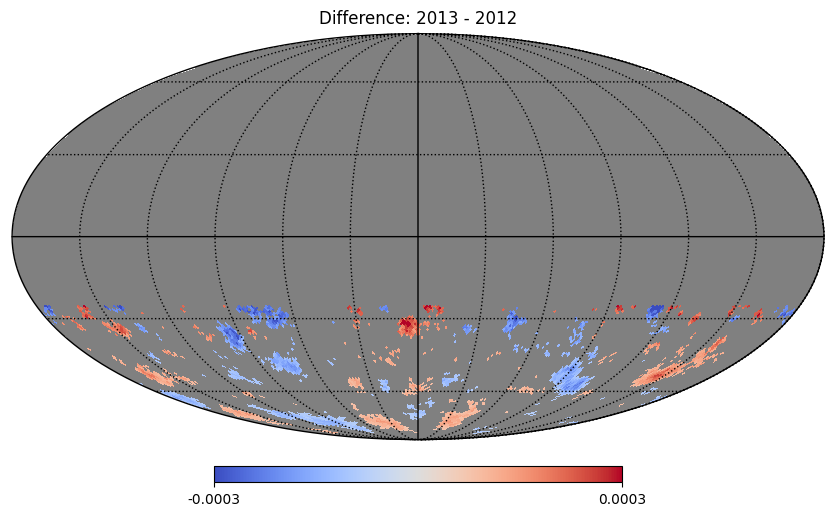

3.138524236898274e-05
0.00010157367239612725


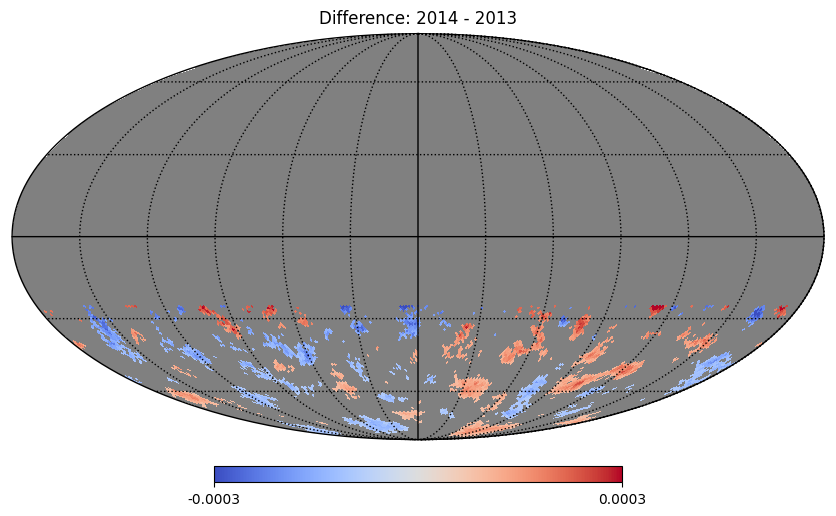

3.1976924431562786e-05
0.00010158635321770067


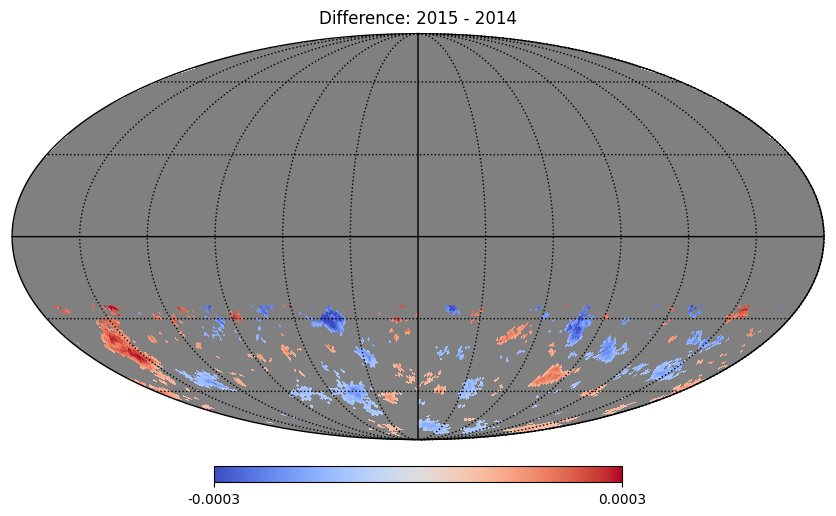

3.1969454606079105e-05
0.00010165039207672412


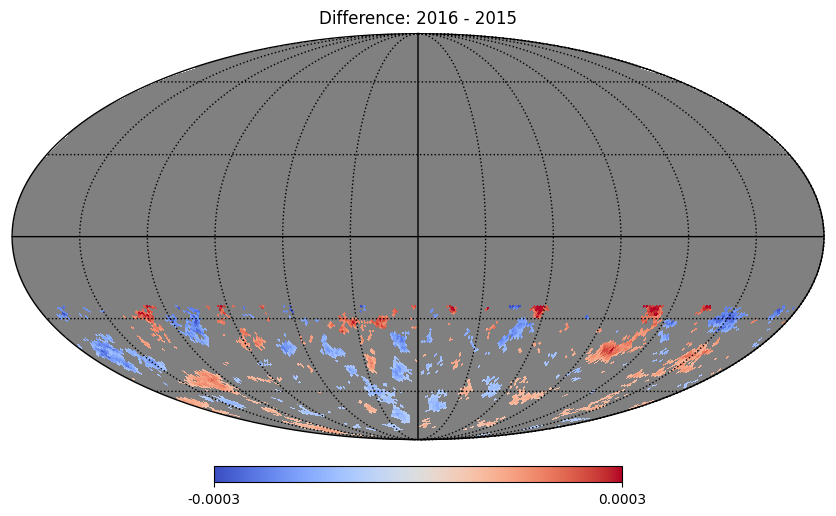

3.38047353825076e-05
0.00010159753061419442


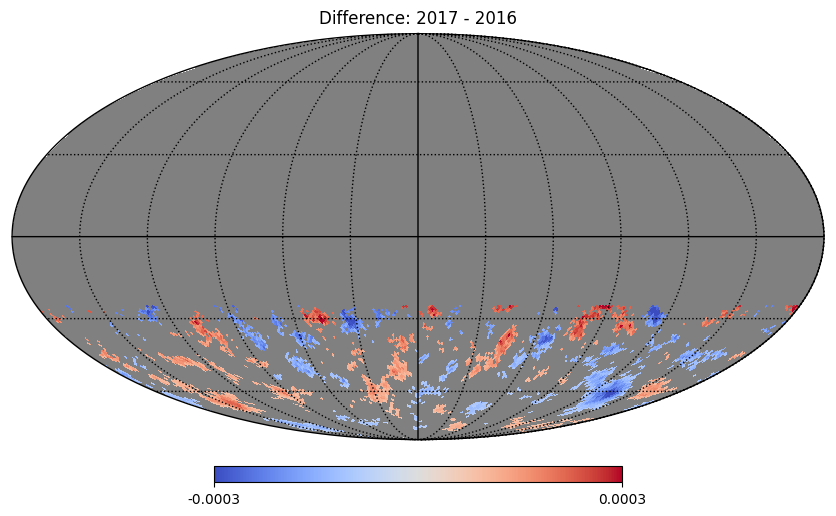

3.379087864944548e-05
0.00010159115364547374


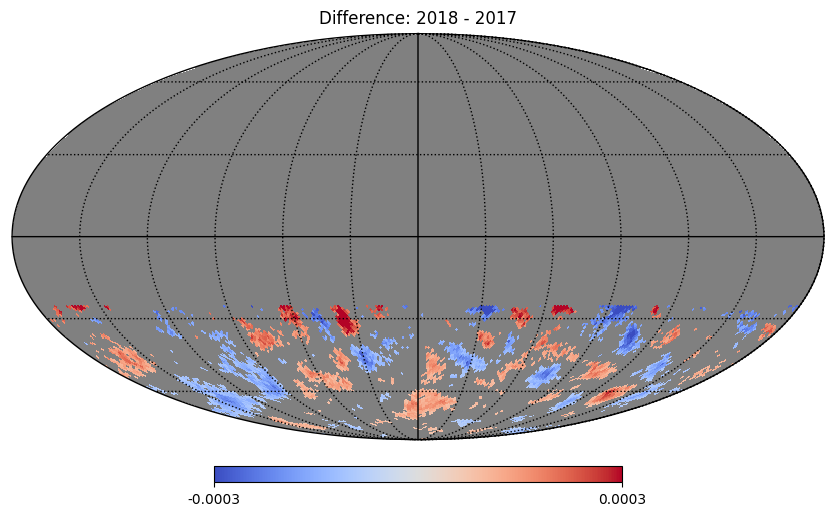

3.364639477078619e-05
0.000101099672532423


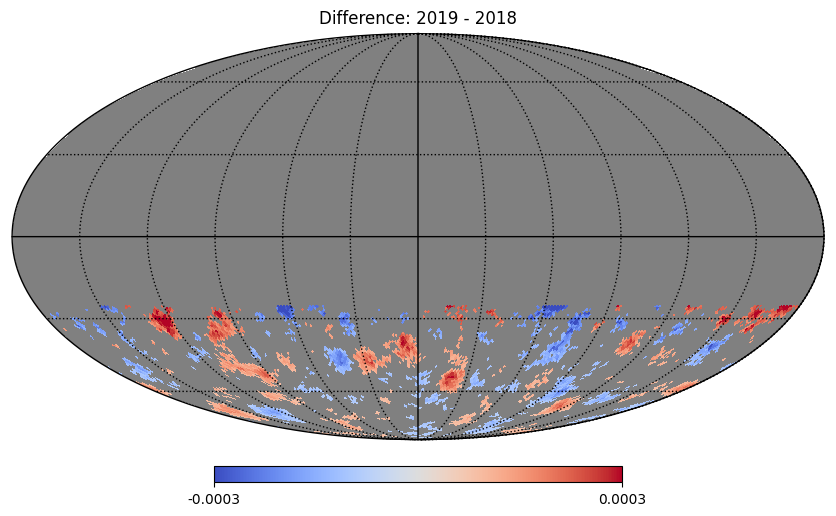

3.3789353301868675e-05
0.00010162681373485157


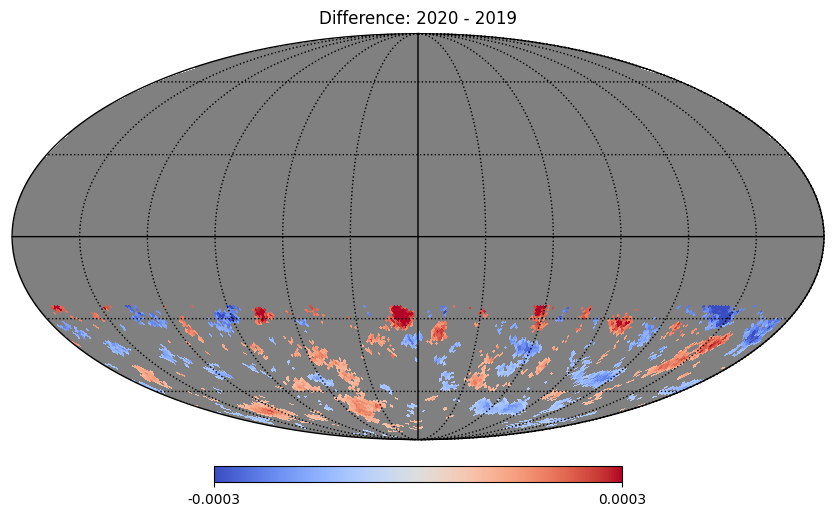

3.3780070792569864e-05
0.00010166984429169262


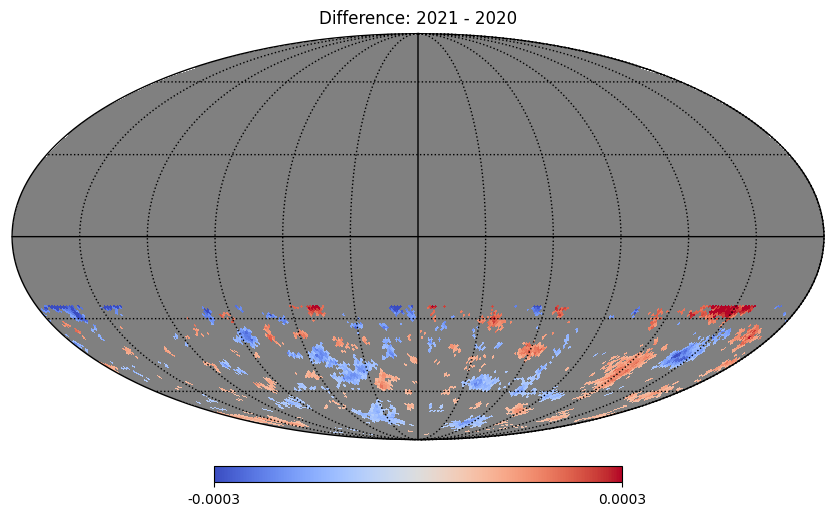

3.381171172094456e-05
0.00010176069047636781


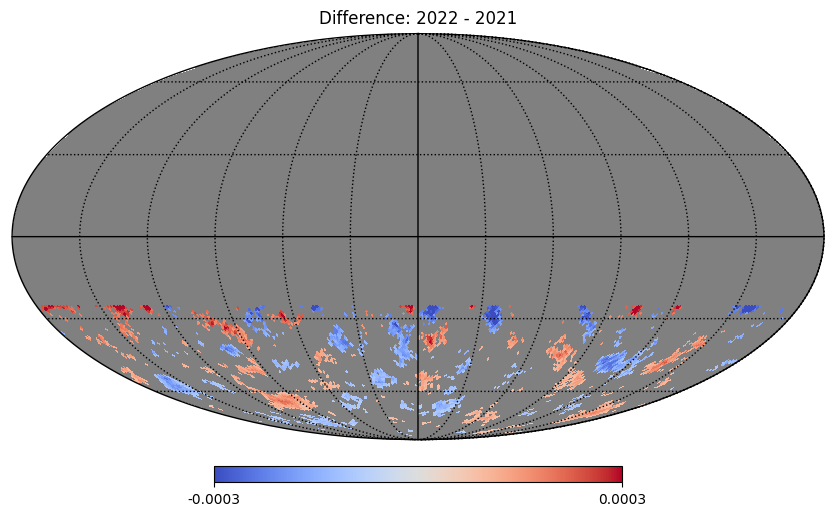

In [2]:
def make_difference_maps_with_error(start_year=2012, end_year=2022):
    prev_map = None
    prev_relerr_map = None  

    for year in range(start_year, end_year + 1):
        summary_map = f'/data/user/fmcnally/anisotropy/maps/maps_12yr_N10/merged/IC86-{year}_N10_sid.fits'
        current_map = getMap([summary_map], mapName='relint', smooth=5, verbose=False, mask=True)
        relerr_map = getMap([summary_map], mapName='relerr', smooth=5, verbose=False, mask=True)

        print(relerr_map[relerr_map!=hp.UNSEEN].min())
        print(relerr_map.max())
        if prev_map is not None and prev_relerr_map is not None:
            # for the difference map
            diff_map = current_map - prev_map
            # for zero-dif pixels
            diff_map[diff_map == 0] = hp.UNSEEN 

            # for the sum of relative errors for consecutive years
            summed_relerr_map = prev_relerr_map + relerr_map

            # to compare the significance of the difference
            significance_map = np.zeros_like(diff_map)
            # to mark pixels where the difference exceeds the error
            significance_map[np.abs(diff_map) > summed_relerr_map] = 1  # Mark pixels where the difference exceeds the error
            
            # for error map
            error_map = diff_map * significance_map
            error_map[error_map == 0] = hp.UNSEEN  

            # to plot  difference maps
            hp.mollview(error_map, min=-0.0003, max=0.0003, title=f'Difference: {year} - {year-1}', cmap='coolwarm')
            hp.graticule()
            plt.savefig(f'diff_{year}_{year-1}.png', dpi=200, bbox_inches='tight')
            plt.show()

        
        prev_map = current_map
        prev_relerr_map = relerr_map

make_difference_maps_with_error()
